In [544]:
import math
import numpy as np
from matplotlib import pyplot as plt

### Klasa Point

In [545]:
class Point:
    def __init__(self, x: float, y: float):
        self.x = x
        self.y = y

    def toVector(self):
        return (self.x,self.y)

    def print(self, color: str):
        plt.scatter(self.x, self.y, color=color)  # plotting single point
        

### Klasa Linia

In [546]:
class Line:
    def __init__(self, head: Point, tail: Point):
        self.head = head
        self.tail = tail

    def print(self, color):
        #print(self.head.x,self.head.y, self.tail.x, self.tail.y)
        plt.plot([self.head.x,self.tail.x], [self.head.y,self.tail.y], linestyle="-", color = color)

### Obliczanie pola trójkąta

In [547]:
def triangleArea(P1: Point, P2: Point, P3: Point,color) -> int:
    a = (P2.x-P1.x, P2.y-P1.y)
    b = (P3.x-P1.x, P3.y-P1.y)
    
    Line(P1,P2).print(color)
    Line(P1,P3).print(color)
    Line(P2,P3).print(color)
    P = 1/2*((a[0]*b[1])-(a[1]*b[0]))
    if P < 0:
        P*=-1
    return P

### Obliczanie pola Figury poprzez podział na trójkaty

In [548]:
def figureArea(node):
    colors=["b","g","r","c","m","y","k","orange","purple"]
    s = Point(float(node[0][0]),float(node[0][1]))
    Area = 0
    for i in range(1,len(node)-1):
        Area += triangleArea(s,Point(node[i][0],node[i][1]),Point(node[i+1][0],node[i+1][1]),colors[i])
    return Area

67.5


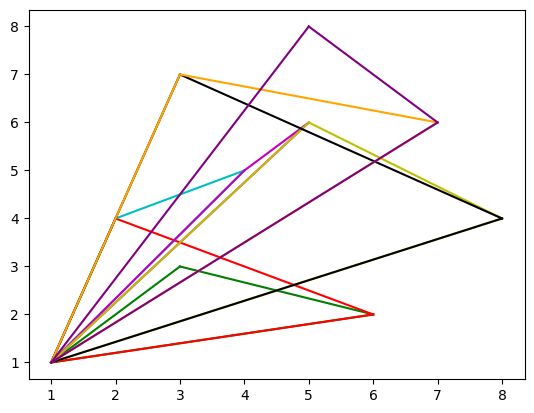

In [549]:
a = np.genfromtxt("figura.txt", delimiter=" ", usemask=True)
print(figureArea(a))

### Klasa KDtree - budowa węzła drzewa KD

In [550]:
class KDtree:
    def __init__(self, Axis: float, Key:float, Left, Right):
        self.Axis = Axis
        self.Key = Key
        self.Left = Left
        self.Right = Right

#### Budowanie drzewa KD - punkty są w liściach

In [551]:
def KDtreeBuild(node, depth):
    if len(node) <= 1:
        return KDtree(0,node[0], None, None)
    axis = depth%2
    
    node = node[node[:,axis].argsort()]
    mid = len(node)//2
    
    L = node[:mid+1]
    R = node[mid+1:]
    if len(node) <= 2:
        L = node[:1]
        R = node[1:]
    
    Vl = KDtreeBuild(L, depth+1)
    Vr = KDtreeBuild(R, depth+1)
    v = KDtree(axis,node[mid], Vl, Vr)
    return v

# def build(node, depth):
    # if len(node) <= 1:
    #     return None
    # axis = depth%2

    # node = node[node[:,axis].argsort()]
    # mid = len(node)//2

    # L = node[:mid]
    # R = node[mid+1:]

    # Vl = KDtreeBuild(L, depth+1)
    # Vr = KDtreeBuild(R, depth+1)
    # v = KDtree(axis,node[mid], Vl, Vr)
    # return v

In [552]:
KDnode = [0 for col in range(len(a))]
for i in range(len(a)):
    KDnode[i] = Point(a[i][0],a[i][1])

v = KDtreeBuild(a,0)

#### Wypisywanie i rysowanie struktury drzewa KD

In [553]:
def printTree(prefix, node, isLeft, axis):
    if node != None:
        print(prefix, end="")
        if isLeft:
            print("|--",end="")
            print("(" , node.Key, axis,")")
            printTree((prefix + "|   "), node.Right, True, (axis+1)%2)
            printTree((prefix + "|   "), node.Left, False, (axis+1)%2)
        else:
            print("L--",end="")
            print("(" , node.Key, axis, ")")
            printTree((prefix + "    "), node.Right, True, (axis+1)%2)
            printTree((prefix + "    "), node.Left, False, (axis+1)%2)
            
def drawTree(node,  axis):
    if node != None:
        #if node.Left!= None or node.Right!= None :
        #    if node.Axis == 0:
        #        plt.axvline(x = node.Key[node.Axis], color = 'b')
        #    else:
        #        plt.axhline(y = node.Key[node.Axis], color = 'g')
        if not node.Left and not node.Right:
            Point(node.Key[0],node.Key[1]).print("k")
        drawTree(node.Right, (axis+1)%2)
        drawTree(node.Left, (axis+1)%2)


#### Znajdowanie najbliższego sąsiada punktu za pomcą drzewa KD

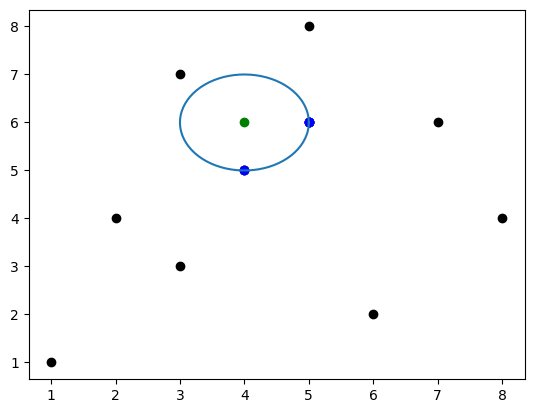

In [554]:
def pointsDistance(A:Point,B:Point):
    return math.sqrt(math.pow(A.x-B.x,2)+math.pow(A.y-B.y,2))
    
def searchCLoser(node:KDtree, point:Point, closest:Point):
    L = None
    R = None
    if node.Left:
        L = searchCLoser(node.Left, point, closest)
    if node.Right:
        R = searchCLoser(node.Right, point, closest)
        
    if pointsDistance(Point(node.Key[0],node.Key[1]),point) < pointsDistance(closest,point):
        return Point(node.Key[0],node.Key[1])
    
    if L and R:
        print(L.x,L.y,R.x,R.y)
        if pointsDistance(L,point) <= pointsDistance(R,point):
            return L
        elif pointsDistance(L,point) > pointsDistance(R,point):
            return R
    elif L:
        print(L.x,L.y)
        return L
    elif R:
        print(R.x,R.y)
        return R
    return None
    
def sameDist(node:KDtree, point:Point, closest:Point):
    if node.Left:
        sameDist(node.Left, point, closest)
    if node.Right:
        sameDist(node.Right, point, closest)
        
    if pointsDistance(Point(node.Key[0],node.Key[1]),point) == pointsDistance(closest,point):
        Point(node.Key[0],node.Key[1]).print("b")
    
def nearestPoint(root:KDtree, point:Point):
    point.print("g")
    node = root
    parent = node
    while node.Left and node.Right:
        if point.toVector()[node.Axis] <= node.Key[node.Axis]:
            parent = node
            node = node.Left
        else:
            parent = node
            node = node.Right
    
    nearestPoint = Point(node.Key[0],node.Key[1])
    r = pointsDistance(nearestPoint,point)
    parentPoint = Point(parent.Key[0],parent.Key[1])
    R = pointsDistance(parentPoint,point)
    if R < r:
        nearestPoint = parentPoint
        r = R
    
    closer = searchCLoser(root,point,nearestPoint)
    if closer:
        nearestPoint = closer
        r = pointsDistance(nearestPoint,point)
    
    sameDist(root,point,nearestPoint)
    
    nearestPoint.print("b")
    angle = np.linspace( 0 , 2 * np.pi , 150 ) 
    x = r * np.cos( angle ) + point.x
    y = r * np.sin( angle ) + point.y
    plt.plot( x, y ) 
        
drawTree(v,0)
#printTree("", v, False, 0)
nearestPoint(v,Point(4,6))